# Introduction to Scraping
<b> By Daniel Gladman, December 2022 </b>

This short tutorial will provide a simple example of audio file scraping to data scientists who are interested in learning how to scrape data from the internet.

This is an important skill for data scientists to have. Often when you are beginning a project or wanting to test your own hypothesis, you will often find that the required dataset
doesn't exist. And if it does exist, then, perhaps the project has already been built or the hypothesis has already been tested.

What is a little surprising to me is how little emphasis is placed on Data Scraping in most data science courses and tutorials. Of the tutorials I have searched for, many provide very basic examples of
scraping text or pictures from their own simple custom websites or well known websites and search engines. Its understandable as scraping is a grey area in terms of what is acceptable to scrape and what is not, 
but this means that sometimes it is difficult to apply the information provided in these tutorials to the specifc project you might have in mind. In other words, the question people usually have is not 
"how do I scrape?", it is usually "how do I scrape this particular thing?".

This is why I decided to write this quick tutorial on how to scrape audio files, how to manipulate them and save them to a particular location. 

Audio scraping will be an important skill for Project Echo as having more diverse audio data will open up more possibilities for our algorithm. 

I chose a public github project which provides no information regarding restrictions of use for this example. Scraping github in this way isn't the most efficient way to obtain all of the data when one can simply clone the repository. However, that is not the point. The point is to give you the tools on how to go about manually extracting the files you need. Perhaps you only need a certain amount of files? This tutorial will hopefully give you some ideas on how you can find audio files in other places on the internet and extract what you need.

## Loading the Libraries

This tutorial will be using the requests library which is used to extract information usually from a url. This BeautifulSoup library will take the information gathered from requests and store all the information in a way that can be parsed for key terms. Knowing how to do this well will require a little bit of knowledge of html and css, but it isn't entirely neccessary. You will learn as you go the more you do it.

The other libraries we will be using are the os and shutil libraries which will perform write, move, rename and delete functions with the files we scrape.



In [2]:
from bs4 import BeautifulSoup
import requests
import os
import shutil

## Requests
First we use the requests.get method to connect to and retrieve information from a given server. There is no manipulation to what is retrieved, it will be retrieved in its raw form.

The webpage that we will be connecting to and retriving looks like this.

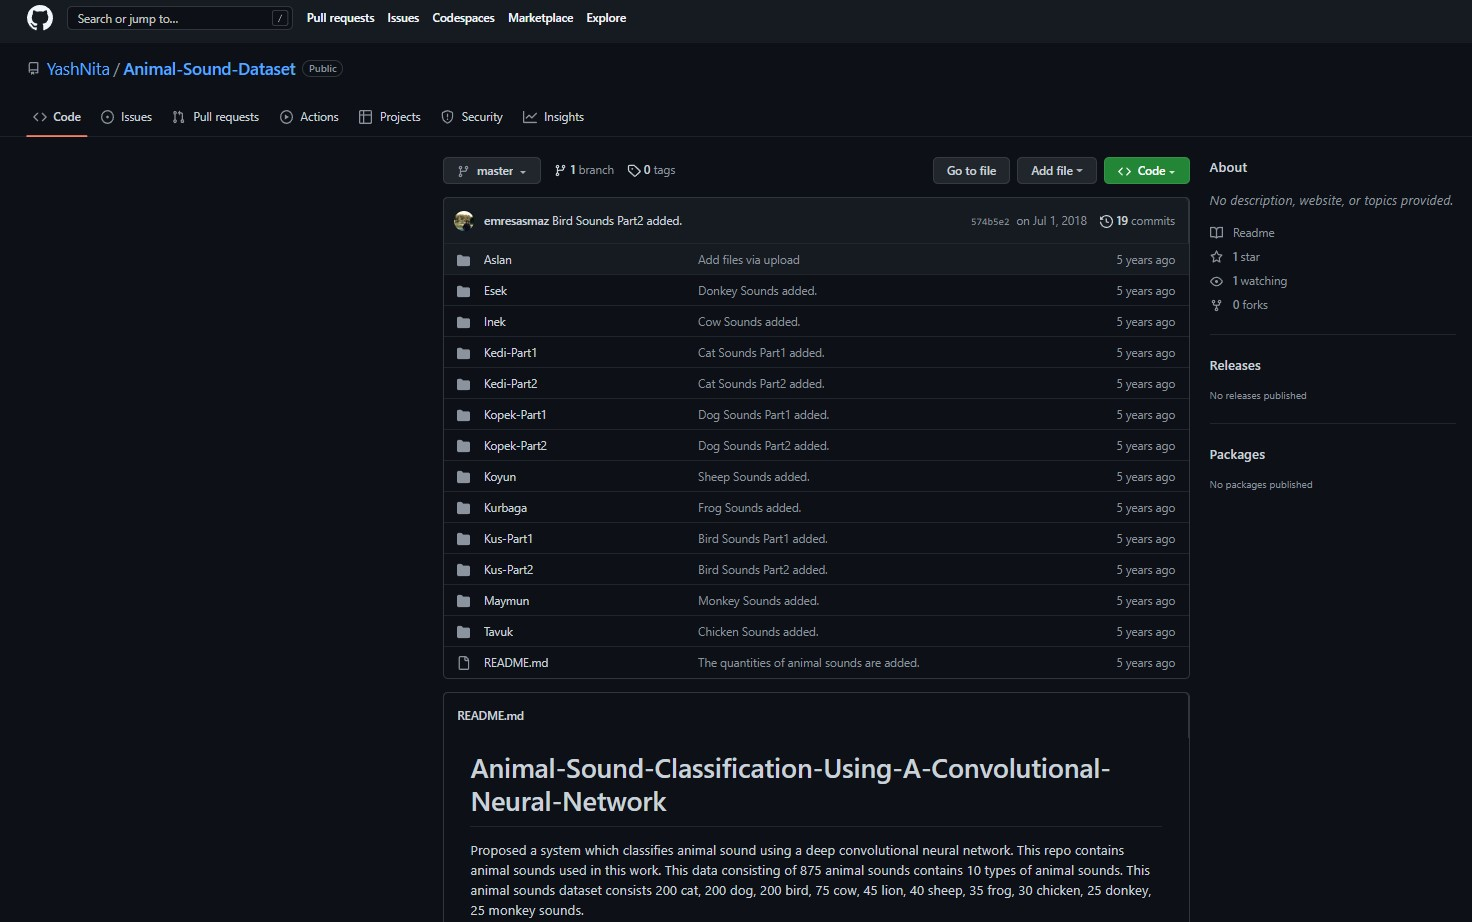

In [3]:
f = requests.get('https://github.com/YashNita/Animal-Sound-Dataset')
f

<Response [200]>

Notice that the Response is [200]. This is good. This means that the request was successful. Sometimes, you will get a different code such as [500]. This means that there is an unexpected problem with the server and it cannot respond to the request at this time. Sometimes, you will get a [400] code which is a bad request error. This means that there is something wrong with the request that is being sent and the server has decided that it will not respond to the request. Finally and perhaps the one that may give you the feeling of a punch in the guts is a [403] code, which means that you are forbidden from accessing the server. This will often happen to scrapers because as it turns out, people don't like having their data harvested and will put up blockers to prevent scraping. There are ways to get around this, and perhaps this is the real topic that everyone wants to know but nobody talks about for obvious reasons, but this goes beyond the scope of what we will be discussing today.

If you come across a 403 forbidden error, discuss it with the team and the reasons why you might be getting the forbbiden error and what it could mean for the project (e.g. are there copyright issues?). You may come up with a solution, or decide to look for a different resource.

## Beautiful Soup

Next we will take the requests object and pass it into the BeautifulSoup method and store it in a variable called soup.

I won't demonstrate it here, but if you print the soup variable, you will notice that the entire html and css information of this particular webpage is displayed.

Now suppose we want to capture just the folder names on the webpage. Why? Well we could use this information to create folders on our local drive that mimic the repository.

How? Well one method would be to open up the webpage in a browser (I'm using Brave which works off Google Chrome). We can right click on a folder and select "Inspect". In different browsers is may not read exactly the same, it might be "inspect element", but what you hope to see is a window being opened that contains the html and css information. What this will do is it will show you the precise part of this information that prints the text of the folder name to the webpage. Note, if you are more advanced with web design then you will probably be able to anticipate the elements that you will be interested in and may even be able to narrow down and identify them without visiting the page at all by running a few queries on those elements. But lets keep it simple for now.

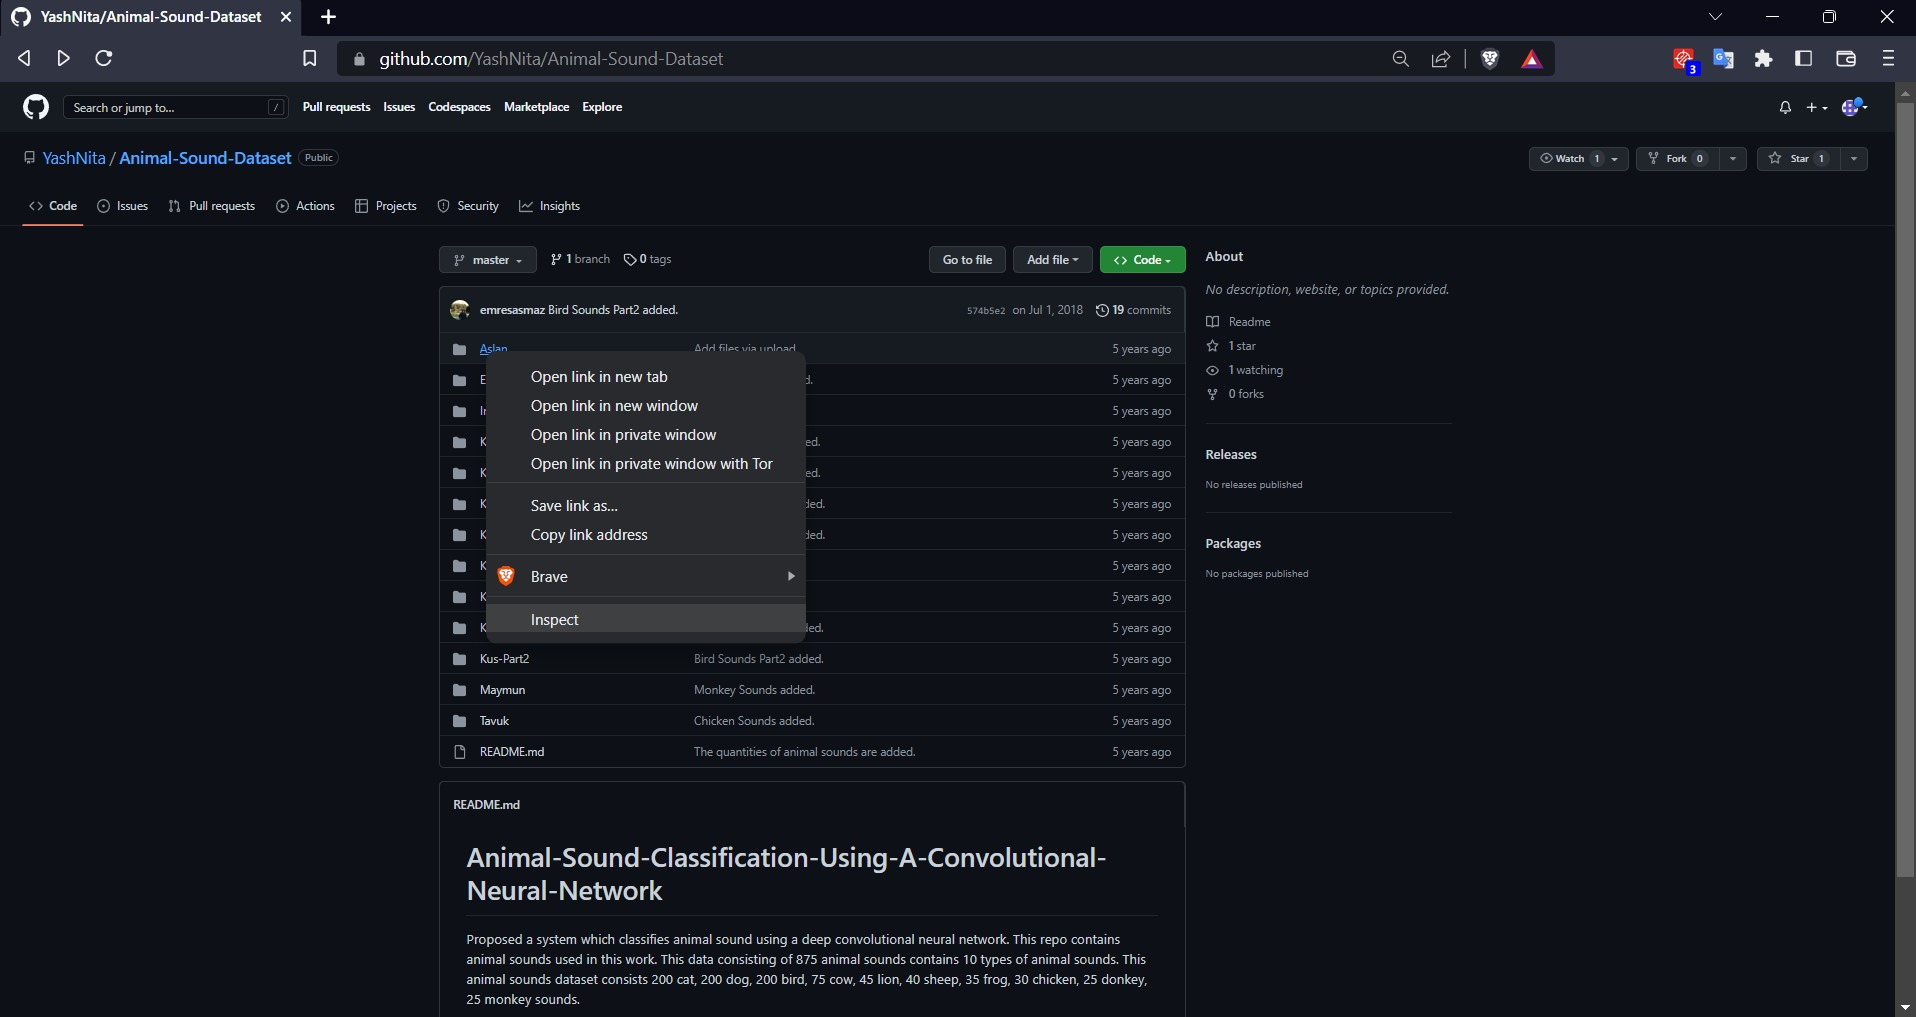
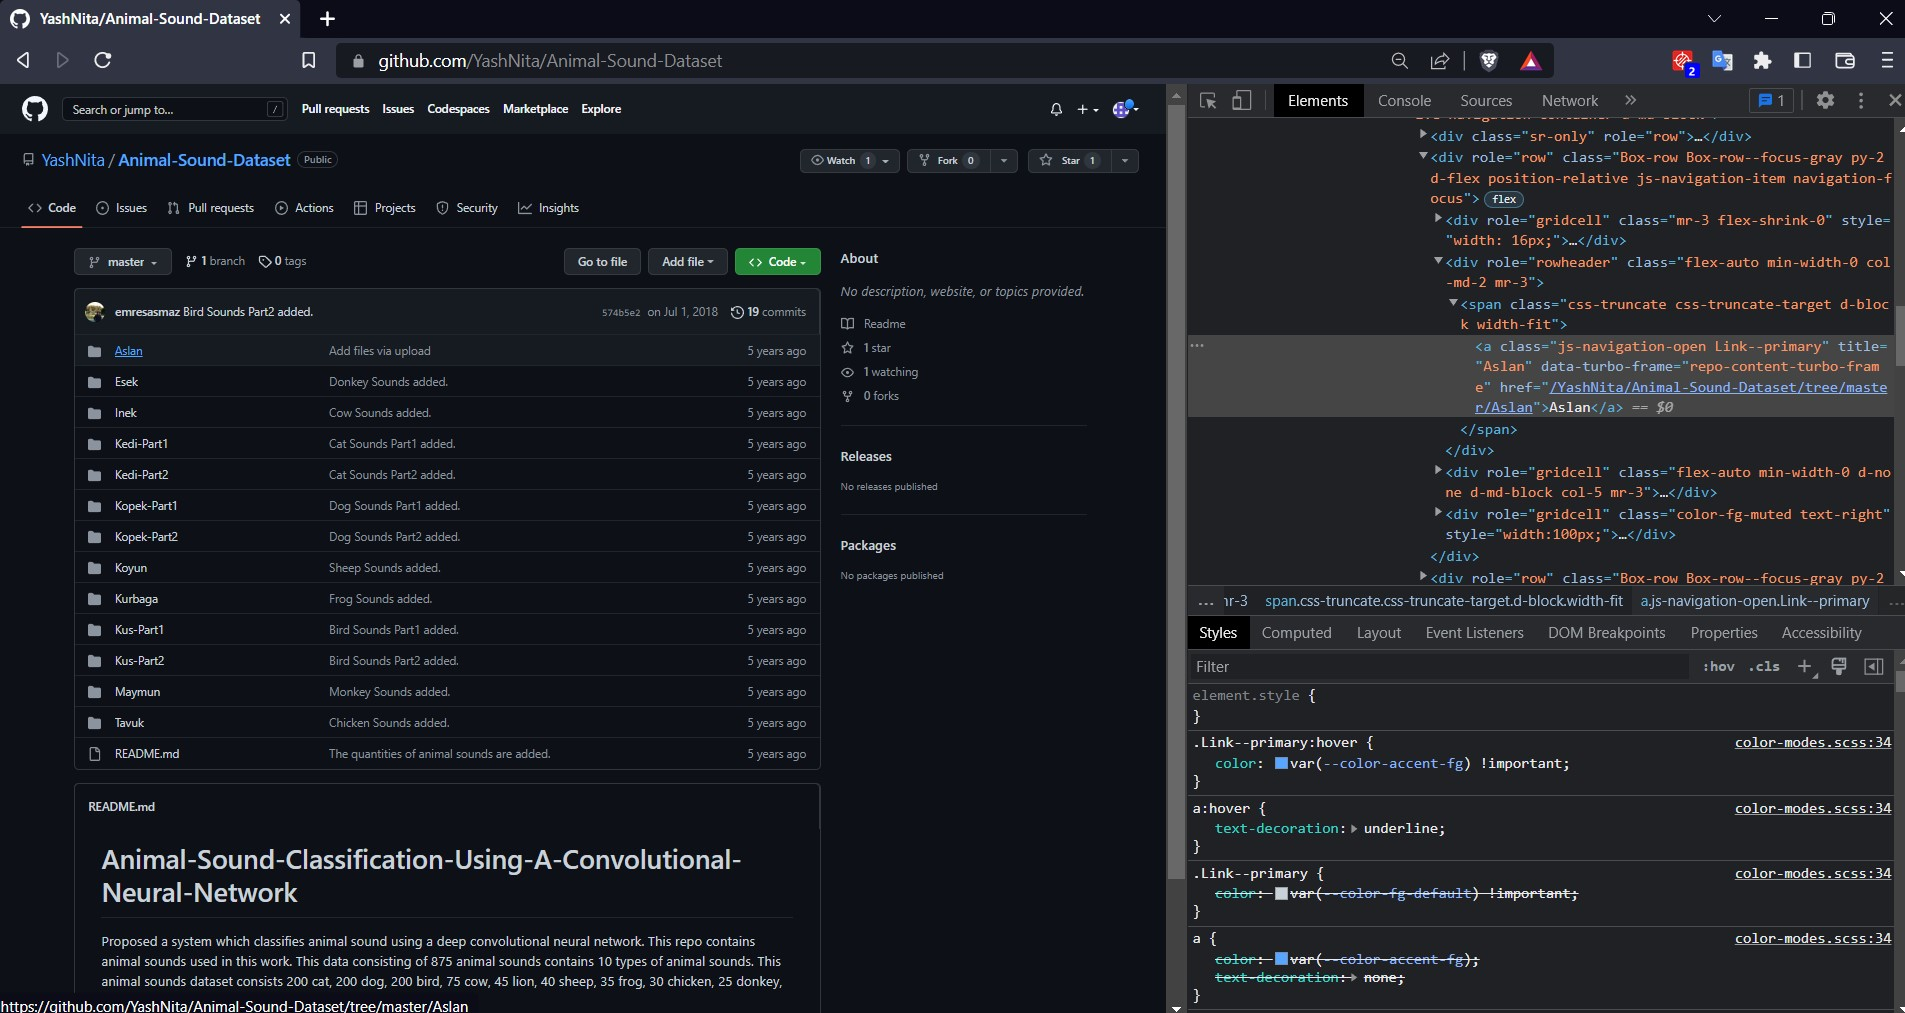


Now if you inspect a few of these folders, you will notice that there are some common themes. Particularly with the classese among the html tag elements. Knowing a bit about html will help here, but the very basic structure of a web page and the position of a particular object will be represented by a tag, which can be nested within tags. For instance, in our case the folder name text is contained in a "span" within some tag denoted by <>. But there might be more than one "span" tag within a webpage, so how do you know you are referencing the right one? Often the "class" will help narrow down the search as these classes are usually given specfic css properties that make the element look a certain way. But we aren't actually interested in the "span" class, what we really want is the "a" tag which is how hyperlinks are generated on a webpage, which we will get to in the next step. The span class simply helps us narrow down with a tags we will want that give us the information we need to grab the text.

Finally we will create a for loop that will parse the entire webpage and find the elements that match the information we have identified. I will print the results to the screen, but ideally you would wrap this information into a list that could be used later.

In [9]:
# Print all the folder names.
soup = BeautifulSoup(f.text)
for i in soup.findAll("span",{"class":"css-truncate css-truncate-target d-block width-fit"}):
    print((i.find("a",{"class":"js-navigation-open Link--primary"})).text)

As mentioned earlier, we will want the links to each folder as well. The reason is because the audio files are not stored on this page. We will need to visit each of these links and perform the same procedure again to find the link to the actual audio file itself.

The link will usually be identified by a 'href', which what we we will use to modify our for loop by returning the "a" tags where href exists.

In [16]:
for i in soup.findAll("span",{"class":"css-truncate css-truncate-target d-block width-fit"}):
    for a in i.findAll('a', href=True):
        print(a['href'])


/YashNita/Animal-Sound-Dataset/tree/master/Aslan
/YashNita/Animal-Sound-Dataset/tree/master/Esek
/YashNita/Animal-Sound-Dataset/tree/master/Inek
/YashNita/Animal-Sound-Dataset/tree/master/Kedi-Part1
/YashNita/Animal-Sound-Dataset/tree/master/Kedi-Part2
/YashNita/Animal-Sound-Dataset/tree/master/Kopek-Part1
/YashNita/Animal-Sound-Dataset/tree/master/Kopek-Part2
/YashNita/Animal-Sound-Dataset/tree/master/Koyun
/YashNita/Animal-Sound-Dataset/tree/master/Kurbaga
/YashNita/Animal-Sound-Dataset/tree/master/Kus-Part1
/YashNita/Animal-Sound-Dataset/tree/master/Kus-Part2
/YashNita/Animal-Sound-Dataset/tree/master/Maymun
/YashNita/Animal-Sound-Dataset/tree/master/Tavuk
/YashNita/Animal-Sound-Dataset/blob/master/README.md


Now that we've done that, we will need to be able to replicate this process, but on the page with the list of audio files themselves. 

Here is an example of one of the pages.

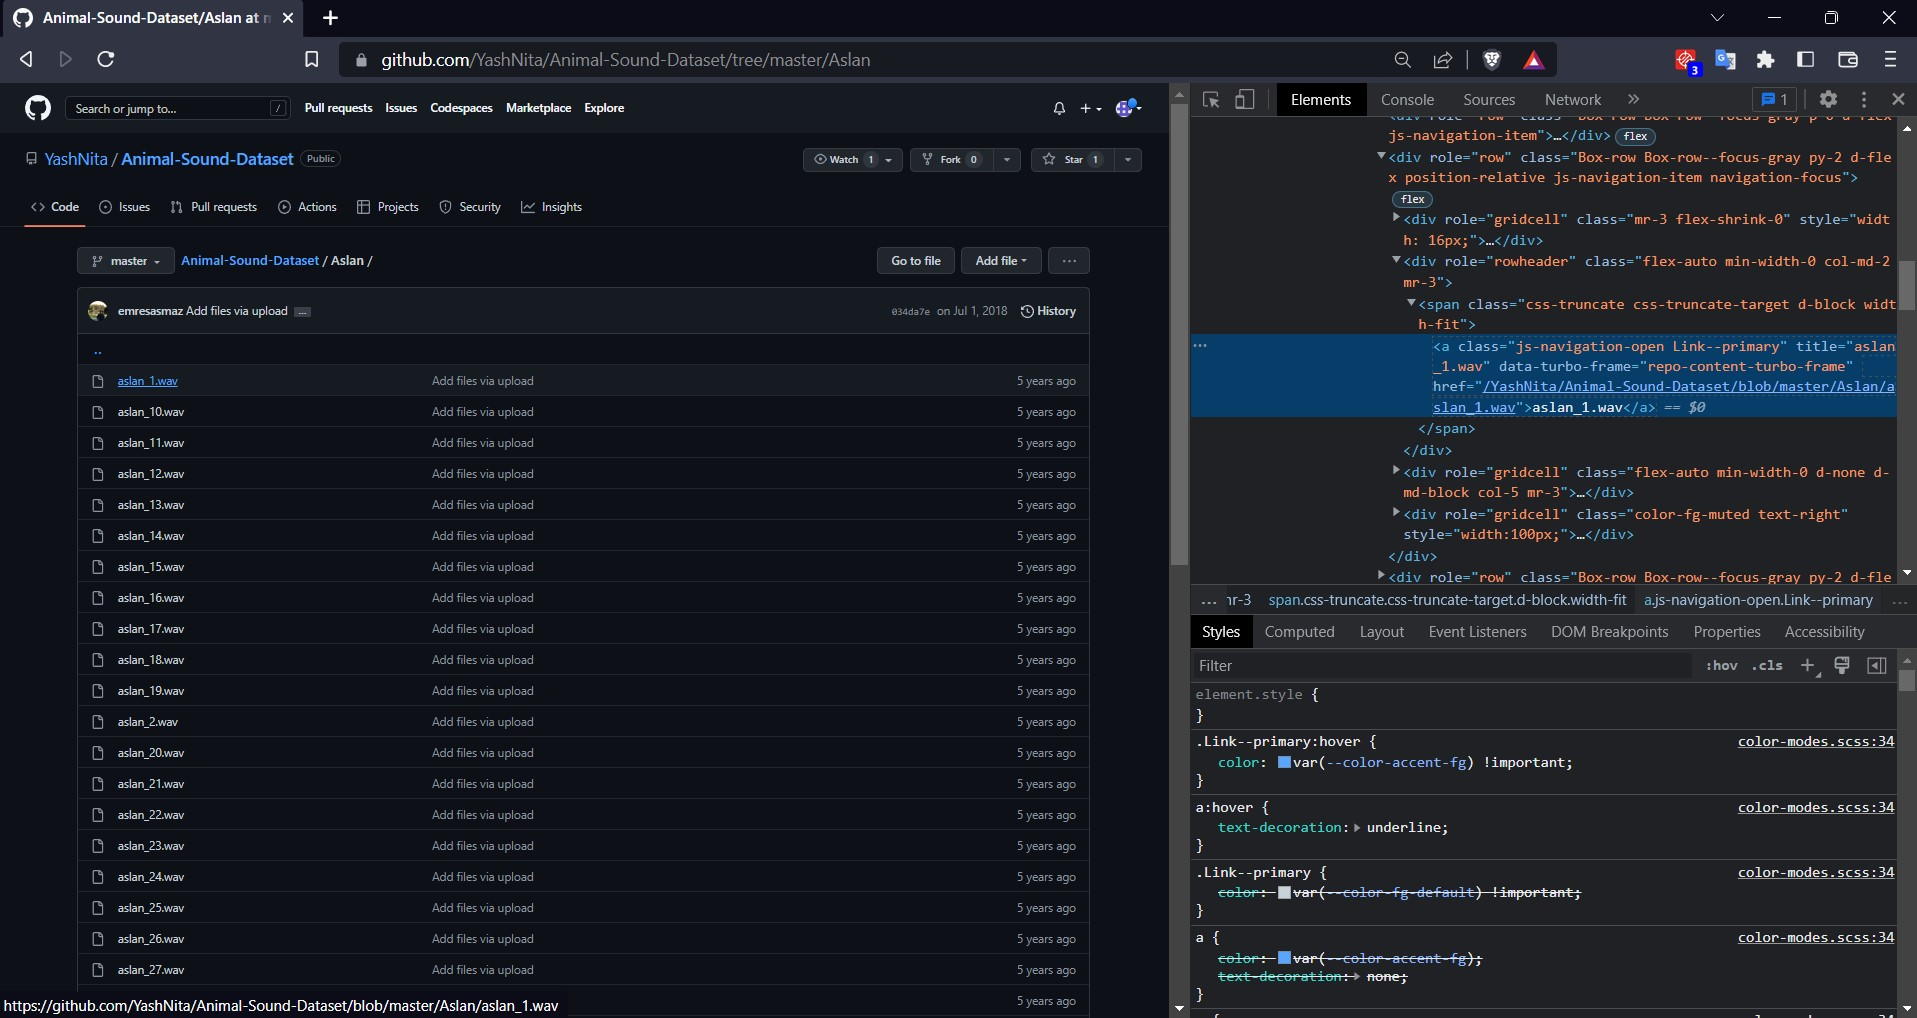

Repeating the step from earlier we can generate links to all the files at once. I have printed them to the screen on this occasion.

In [17]:
f2 = requests.get('https://github.com/YashNita/Animal-Sound-Dataset/tree/master/Aslan')
soup2 = BeautifulSoup(f2.text)

for i in soup2.findAll("span",{"class":"css-truncate css-truncate-target d-block width-fit"}):
    for a in i.findAll('a', href=True):
        print(a['href'])

## Downloading the files

Now that we have some links, we are good to go. Lets start with downloading one file before we scale up to automating the process.

We will use the requests to grab the audio file using the direct url link. You will notice something different about the link, and I will address that later, but simply put when downloading information from github, it must be downloaded in its raw form. So, the direct link we scrapped earlier will not work properly without changing its form so that it points to the raw file. This is easy to automate and I will do so later.

Once we have got the response from the server, we will need to call the open method to specify the file name we wish to use, and the action to be taken with it. We will aso on the same line call the write method and insert the content from the response into the method.

This will write a file in your default directory.

Feel free to delete the file after you are done as we will proceed with writing some code that will automate this entire process for us.

In [19]:
example_URL_DL = "https://github.com/YashNita/Animal-Sound-Dataset/blob/master/Aslan/aslan_1.wav?raw=true"
response = requests.get(example_URL_DL)
open("aslan_1.wav", "wb").write(response.content)

397228

## Miscellenous methods needed to automate the scrapping

There are a couple of things that I should demonstrate before proceeding which will hopefully help you understand the code that will follow.

First off, what I had demonstrated earlier containeda lot of hard coded examples which are not ideal if we want to automate this process. So we will need to figure out how we can break those elements down.

I'll cover a few here.

#### File names.

Its imperative that we can identify the file name automatically from each file, otherwise the writing process cannot be automated. Fortunately, each link contains the file name within the link and there is a method within the os library that can help parse the link and extract the filename.

First type os.path.basename() and insert one of the links we scrapped earlier. Its important to use the information we scraped earlier because that is what we will feed this method later. You will notice that it will return the file name as a string. Excellent, we can use this.

In [22]:
os.path.basename('/YashNita/Animal-Sound-Dataset/blob/master/Aslan/aslan_1.wav')

'aslan_1.wav'

#### URL manipulation

Recall earlier that there is something we need to do to the links that we scrape in order to get them working when we download the audio files. 

Lets analyse the previous example: "https://github.com/YashNita/Animal-Sound-Dataset/blob/master/Aslan/aslan_1.wav?raw=true"

Notice how the beginning of the url just after ".com" and the end of the url after ".wav" are simply appended to the link we used in the example earlier. If you check a few more files yourself, you will notice a pattern which can be exploited using a very basic python mechanic that you no doubt would have used in a "hello world" level python tutorial, string concatenation. 

This solution isn't impressive on its own, but when you are scraping your own sources this is the type of pattern you will want to look for.

In [24]:
segment = '/YashNita/Animal-Sound-Dataset/blob/master/Aslan/aslan_1.wav'
git_url = 'https://github.com'
raw = '?raw=true'

print(git_url + segment + raw)

https://github.com/YashNita/Animal-Sound-Dataset/blob/master/Aslan/aslan_1.wav?raw=true


#### Creating folders

This part will show you how to create a folder and save the file that we downloaded in the example. To do this we will use the os methods makedirs() to make the directory, and we will pass it the directory location using the os.path.dirname() method, which will be given the directory file name. We will also put an "exist_ok" set to True to check whether the directory exists. If it does, it won't create it.

Notice in the code below, there is some hard coding of the directory. However if we are smart we can use some f strings with variables to make the filename variable dynamic. I've shown you have to extract filenames from a link which could be stored as variables. How might you automate the folders? Hint, what was the first thing we scraped and how could we store it?

In [31]:
filename = "./Aslan/aslan_1.wav"
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, "wb") as f:
    f.write(response.content)

## Automating the process.

From here the code chunks will get longer and I won't be explaining as much. You should be able to replicate this yourself, or at least begin to replicate this on a different webpage.

Steps:
- First scrape the names and urls from the main page. I decided to store each as a paired tuple, just so I could access them together later when I begin writing the files.

- Next I drop the readme folder because I don't need it.

- Then I write a loop that iterates through the name and urls, creates the raw url, requests it, and then stores it in the folder name with its respective file name.

The result will be a series of folders in your working directory that mimics what was in the respository. This will take some time as you are downloading each file individually and there are roughly 850 or so files in this repository.

In [106]:
names = []
for i in soup.findAll("span",{"class":"css-truncate css-truncate-target d-block width-fit"}):
    name = (i.find("a",{"class":"js-navigation-open Link--primary"})).text
    names.append(name)

urls = []
for i in soup.findAll("span",{"class":"css-truncate css-truncate-target d-block width-fit"}):
    for a in i.findAll('a', href=True):
        url=(a['href'])
        urls.append(url)

name_urls = []
for name, url in zip(names, urls):
    name_urls.append((name, url))

# Drop the README folder
name_urls.pop()

# DOWNLOAD ALL THE FILES
giturl_stub = 'https://github.com'
raw_stub = '?raw=true'
    
for name_url in name_urls:  
    
    url = giturl_stub + name_url[1]

    f2 = requests.get(url)
    soup2 = BeautifulSoup(f2.text)

    file_urls = []
    for i in soup2.findAll("span",{"class":"css-truncate css-truncate-target d-block width-fit"}):
        for a in i.findAll('a', href=True):
            file_url = (a['href'])
            file_urls.append(file_url)

    for file_url in file_urls:
        dl_url = giturl_stub + file_url + raw_stub
        response = requests.get(dl_url)
        f_name = os.path.basename(file_url)
        filepath = f"./{name_url[0]}/{f_name}"
        os.makedirs(os.path.dirname(filepath), exist_ok=True)
        with open(filepath, "wb") as f:
            f.write(response.content)   

Now we are done right? 

Yeah, we could be. But I want to do a bit further. This repository decided to have multiple folders for the same animal. So I want to consolidate that.

This can be done again with the os library and its rename() method. This method take two parameters, the source path (where the files are coming from) and their destination path (where you want them).

To get the files, I can use the os library again and its listdir() method, which will store all the files within a directory path into a list that can be iterated over. I then concatenate the directory path with the file names and pass them into the rename method. I finally use the os library method rmdir() to delete the now empty source directory folder.

In [107]:
# Consolidate dual-folders that contain same animal

def ConsolidateFolder(source, destination):
    """ This function will move all files from one
    folder to another and then delete the folder
    """
    # gather all files
    allfiles = os.listdir(source)
 
    # iterate on all files to move them to destination folder
    for f in allfiles:
        src_path = os.path.join(source, f)
        dst_path = os.path.join(destination, f)
        os.rename(src_path, dst_path)
        os.rmdir(source)


ConsolidateFolder('./Kopek-Part2', './Kopek-Part1')
ConsolidateFolder('./Kedi-Part2', './Kedi-Part1')
ConsolidateFolder('./Kus-Part2', './Kus-Part1')


Are we done yet? Yeah maybe, but again I want to go a bit further. 

The names of the folders may be unfamiliar to you. They are actually Turkish words for animals. We could leave it in Turkish, but for a non-speaker of that language this might be confusing. Lets rename the folders and the files such that they are in their english equivalent.

- aslan = lion
- esek = donkey
- inek = cow
- kedi = cat
- kopek = dog
- koyun = sheep
- kurbaga = frog
- kus = bird
- maymun = monkey
- tavuk = chicken

Because we have deleted some folders, this section will need to be a little manual to get working. There is probably a better solution, but I am getting a little tired and this is what I came up with on the fly.
What I will do is create a paired tuple that pairs each Turkish folder name with its english equivalent. I will recycle the name_url variable I used earlier to do so. But, because I have deleted some folders ealier, I will create a subset of the names in name_url that are not in a list of the deleted folder names.

I then will use the same os.rename() mthod earlier, but this time I will iterate over all the pairs in the tuple and use f strings to make the string path parameters dynamic. A notable technique is the str.partition() method with allows one to parse a string and return a substring based on a given character or combination of characters.

As a final act, I would like make all of these newly renamed directories and their newly renamed files a subdirectory of a newly created general directory called Data. This will make it easier to upload the neccessary information to a cloud storage system (for example).

To do that, I will use the shutil library. If you've been wondering why I included this library and not used it at all, now you know. This follows the same principles of the os library methods for moving files, the method takes a source path and a destination path as parameters.

In [108]:
turkish_names = []
for name_url in name_urls:
    turkish_name = name_url[0]
    turkish_names.append(turkish_name)

english_names = ["lion", "donkey", "cow", "cat",  "dog", "sheep", "frog", "bird", "monkey", "chicken"]
deleted_folders = ['Kedi-Part2', 'Kopek-Part2', 'Kus-Part2']

turkish_names = [x for x in turkish_names if x not in deleted_folders]

translations = []
for turkish, english in zip(turkish_names, english_names):
    translation = (turkish, english)
    translations.append(translation)

# Rename the folders
for translation in translations:
    os.rename(f"{translation[0]}",f"{translation[1]}")

# Rename the files
for name in english_names:
    for file in os.listdir(f'./{name}/'):
        os.rename(f"./{name}/{file}",f"./{name}/{name}_{file.partition('_')[2]}") 

# Consolidate files into a Data folder

filepath = "./Data/"
os.makedirs(os.path.dirname(filepath), exist_ok=True)

for name in english_names:
    source = f"./{name}/"
    shutil.move(source, filepath)


Thats it. We're finished.

I hope this tutorial was helpful and gives you a bit of an idea on how you can go out and scrape some audio data for this project yourself.